In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from configure import consumer_key, consumer_secret, access_token, access_token_secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())
import time

In [2]:
# Target User Accounts
target_user = ("@drvox", "@NateSilver538", "@willwilkinson", "@ClareMalone","@baseballot")


# List for dictionaries of results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_texts = []
time_stamp =[]
user_name= []

# Loop through each user
for user in target_user:


  
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 26):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x,tweet_mode='extended')

        # Loop through all tweets
        for tweet in public_tweets:
            
        #Append tweet_text list to read the tweets:
            tweet_texts.append(tweet["full_text"])
            time_stamp.append(tweet["created_at"])
            user_name.append(tweet["user"]["screen_name"]) 
                

        # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["full_text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            df = pd.DataFrame(
            {'User Name': user_name,
            'Time Stamp': time_stamp,
            'Text of Tweet': tweet_texts,
            'Compound Score':compound_list,
            'Positive Score':positive_list,
            'Neutral Score': neutral_list,
            'Negative Score':negative_list
     
            })
            nate = df[df['User Name']=='NateSilver538']
            drvox = df[df['User Name']=='drvox']
            clare = df[df['User Name']=='ClareMalone']
            will = df[df['User Name']=='willwilkinson']
            rakich = df[df['User Name']=='baseballot']
            drvox = drvox.reset_index()
            drvox ['Tweets Ago'] = drvox ['index']+1
            drvox = drvox.sort_values(by='Tweets Ago', ascending=False)
            nate = nate.reset_index()
            nate ['Tweets Ago'] = nate ['index']-499
            nate = nate.sort_values(by='Tweets Ago', ascending=False)
            will = will.reset_index()
            will ['Tweets Ago'] = will ['index']-999
            will = will.sort_values(by='Tweets Ago', ascending=False)
            clare = clare.reset_index()
            clare ['Tweets Ago'] = clare ['index']-1499
            clare = clare.sort_values(by='Tweets Ago', ascending=False)
            rakich = rakich.reset_index()
            rakich ['Tweets Ago'] = rakich ['index']-1999
            rakich = rakich.sort_values(by='Tweets Ago', ascending=False)
            


In [8]:
def GraphTweets():
    for df in (drvox,nate,will,clare,rakich):
        fig, ax = plt.subplots()
        rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
        ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
        ax.set_xlabel("Tweets Ago")
        ax.set_ylabel("Tweet Polarity")
        ax.set_xlim(501, 0)
        ax.set_ylim(-1, 1.2)
        ax.legend(loc='upper left')
        fig.tight_layout()
        fig.set_size_inches(10, 9)
        plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
        fig.show()
        file = (f'{df.iloc[1,1]} Vader Analysis.png')
        imagePath = file
        status = f'Vader Analysis from @{df.iloc[1,1]}!'
        api.update_with_media(imagePath, status)
        print("Tweeted Succesfully!")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


TweepError: [{'message': 'Application cannot perform write actions. Contact Twitter Platform Operations through https://support.twitter.com/forms/platform', 'code': 261}]

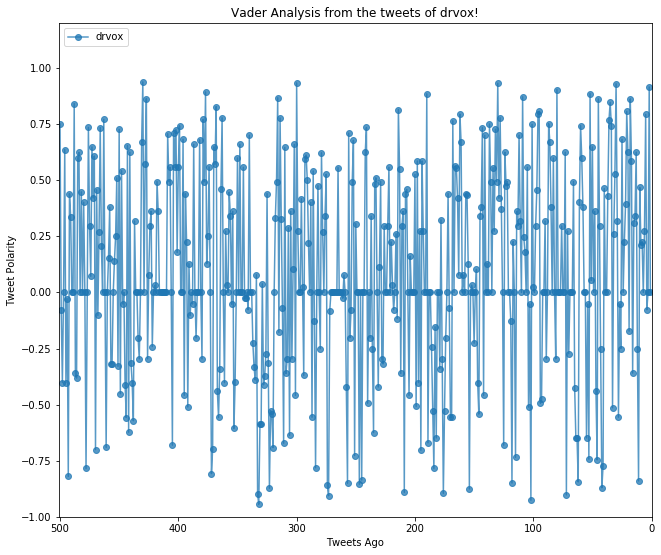

In [9]:
while(True):
    GraphTweets()
    time.sleep(3600)
